In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full = cv2.imread('Computer-Vision-with-Python_udemy/DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

face = cv2.imread('Computer-Vision-with-Python_udemy/DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)


In [4]:
full.shape

(1367, 1025, 3)

In [5]:
face.shape

(375, 486, 3)

In [6]:
sum([1,2,3])

6

In [9]:
mystring = 'sum'

In [10]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [13]:
myfunc = eval(mystring)

In [14]:
myfunc([1,2,3])

6

In [31]:
#We'll use the eval funtion (demonstrated above)to access the methods below
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [19]:
#we'll draw a rectangle where it finds a match

In [20]:
my_method = eval(methods[0])
res = cv2.matchTemplate(full,face,my_method)

In [22]:
#plt.imshow(res)
cv2.minMaxLoc(res)

(-735580608.0, 1755388672.0, (0, 10), (231, 345))

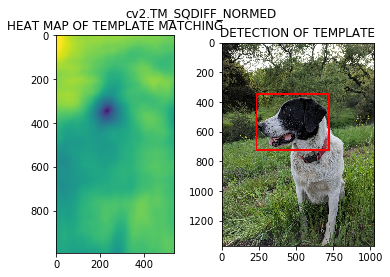

In [32]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    method = eval(m)
    
    # Template Matching.
    res = cv2.matchTemplate(full_copy,face,method)
    
    #identfies teh area of greatest match
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in[cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y)
    else:
        top_left = max_loc
        
    height,width,channels = face.shape
    
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # Plot the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEAT MAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
   # TEMPLATE WITH METHOD USED
    
    plt.suptitle(m)
    
    print('\n')
    print('\n')
    
            